3D shape: (1210, 805, 3)
2D Type: <class 'numpy.ndarray'>
2D dtype: float64
2D shape: (1210, 805)


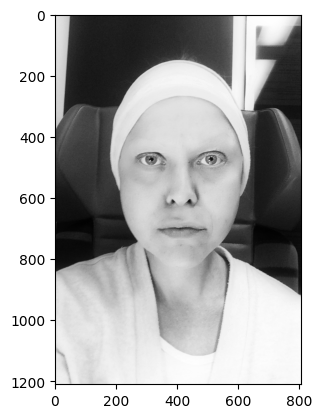

In [8]:
# Automated Digital Segmentation
# Active Contur Segmentation Models and Detection of edge with low error rate

import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import io, color
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
from matplotlib import image as mpimg
from PIL import Image
from numpy import*
import cv2 as cv2
from cv2 import *
import numpy as np
from skimage.transform import resize
from skimage.io import imsave, imread
from PIL import Image
from numpy import asarray
from scipy import ndimage as ndimage
from skimage.util import random_noise
from skimage import feature
from skimage.segmentation import slic, mark_boundaries
from skimage.segmentation import felzenszwalb
from skimage.color import label2rgb


# load image
img = Image.open('test.jpeg')

# convert image into numpy array
numpydata = asarray(img)

# convert image to gray scale
numpydata_gray = color.rgb2gray(numpydata)

# apply gaussian filter to remove gaussian noise from the picture, use the kernel width 3, kernel height 5
# specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively
# If only sigmaX is specified, sigmaY is taken as the same as sigmaX
# If both sigmas are given as zeros, they are calculated from the kernel size

img_gaussian = cv2.GaussianBlur(numpydata_gray,sigmaX=0.5,ksize=(3, 5))

print('3D shape:', numpydata.shape)
print('2D Type:', type(numpydata_gray))
print('2D dtype:', numpydata_gray.dtype)
print('2D shape:', numpydata_gray.shape)
plt.imshow(numpydata_gray, cmap='gray');

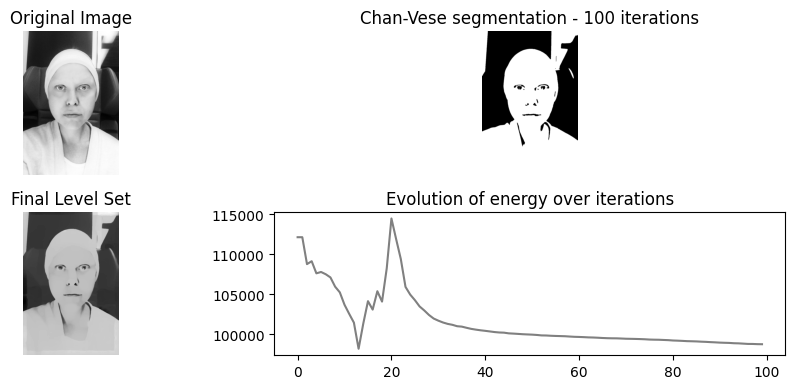

In [38]:
# Computing the Chan VESE segmentation technique - Chan vese method ignores edges and ﬁts a two-phase piecewise constant model to the given image

image = img_as_float(numpydata_gray)

cv = chan_vese(image, max_num_iter=100, mu=0.25, lambda1=1, lambda2=1, extended_output=True )

# Parameter µ adjuststhe length penalty, which balances between ﬁtting the input image more accurately (smaller µ) vs.producing a smoother boundary (larger µ).
# width 10, hight 4
fig, axes = plt.subplots(2, 2, figsize=(10, 4))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2], c="gray")
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

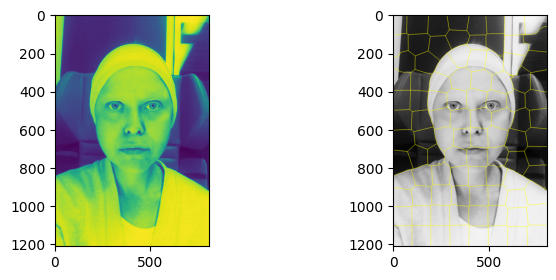

In [39]:
# Simple Linear Iterative Clustering on the image

# Importing required boundaries
from skimage.segmentation import slic, mark_boundaries

# Setting the plot figure as width 8 and hight 3
plt.figure(figsize=(8, 3))

# Sample Image of scikit-image package
img = numpydata_gray

# Applying SLIC segmentation
# for the edges to be drawn over
img_segments = slic(img, n_segments=100, compactness=1)

plt.subplot(1, 2, 1)

# Plotting the original image
plt.imshow(img)

# Detecting boundaries for labels
plt.subplot(1, 2, 2)

# Plotting the output of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(img, img_segments ))


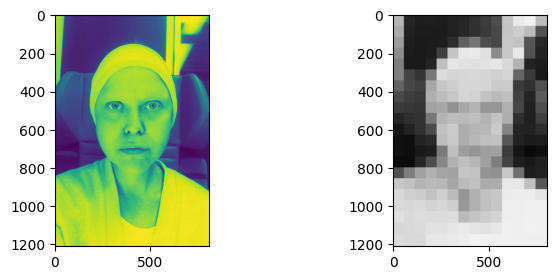

In [40]:
# Simple Linear Iterative Clustering on the image

# Importing required libraries
from skimage.segmentation import slic
from skimage.color import label2rgb

# Setting the plot size as width 8 and hight 3
plt.figure(figsize=(8,3))

# Sample Image of scikit-image package
img = numpydata_gray

# 300 segments & compactness = 10
img_segments = slic(img, n_segments=300, compactness=10)
plt.subplot(1,2,1)

# Plotting the original image
plt.imshow(img)
plt.subplot(1,2,2)

# Converts a label image into
# an RGB color image for visualizing
# the labeled regions.
plt.imshow(label2rgb(img_segments,img,kind = 'avg'))

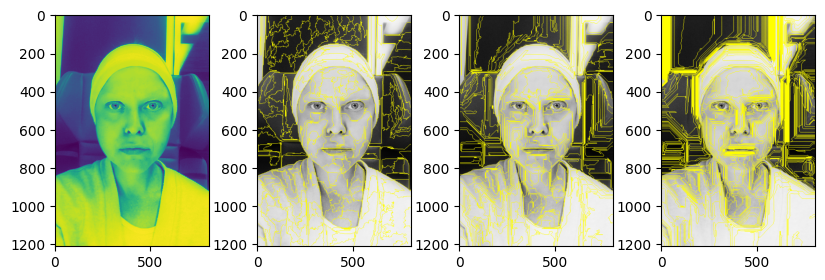

In [41]:
# Felzenszwalb-Huttenlocher, 1998

# Importing the required libraries
from skimage.segmentation import felzenszwalb
from skimage.color import label2rgb

# Setting the figure size as width 10, hight 3
plt.figure(figsize=(10,3))

# Original Image converted to gray scales
img = numpydata_gray

# computing the Felzenszwalb's
img_segments = felzenszwalb(img,scale = 2,sigma=2, min_size=800)
img_segments2 = felzenszwalb(img,scale = 2,sigma=5, min_size=600)
img_segments3 = felzenszwalb(img,scale = 2,sigma=10, min_size=200)

# Plotting the original image
plt.subplot(1,4,1)
plt.imshow(img)

# Marking the boundaries of Felzenszwalb's segmentations
plt.subplot(1,4,2)
plt.imshow(mark_boundaries(img,img_segments))

# Marking the boundaries of Felzenszwalb's segmentations
plt.subplot(1,4,3)
plt.imshow(mark_boundaries(img,img_segments2))

# Marking the boundaries of Felzenszwalb's segmentations
plt.subplot(1,4,4)
plt.imshow(mark_boundaries(img,img_segments3))

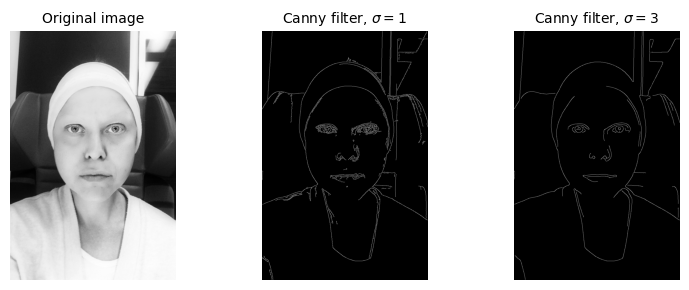

In [16]:
# Canny, 1986

# Compute the Canny filter for two values of sigma
# Canny is the most suitable detector for detecting human faces' edges
# width of the Gaussian (the noisier the image, the greater the width)
# low threshold for the hysteresis thresholding, high threshold for the hysteresis thresholding
# sigma - Standard deviation of the Gaussian filter
# low_threshold - Lower bound for hysteresis thresholding (set to 10% of dtype’s max)
# high_threshold - High_threshold (set to 20% of dtype’s max)

edges1 = feature.canny(img_gaussian, sigma=1, low_threshold=None, high_threshold=None)
edges2 = feature.canny(img_gaussian, sigma=3, low_threshold=None, high_threshold=None)


# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(img_gaussian, cmap='gray')
ax[0].set_title('Original image', fontsize=10)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=10)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=10)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

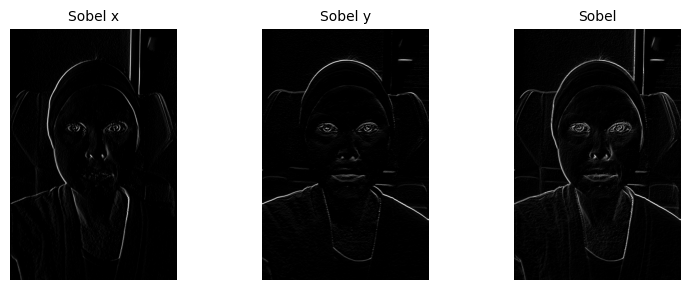

In [19]:
# Sobel and Feldman, 1968

img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U, 1, 0, ksize=7, scale = 1)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U, 0, 1, ksize=7, scale = 1)
img_sobel = img_sobelx + img_sobely


# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(img_sobelx, cmap='gray')
ax[0].set_title('Sobel x', fontsize=10)

ax[1].imshow(img_sobely, cmap='gray')
ax[1].set_title('Sobel y', fontsize=10)

ax[2].imshow(img_sobel, cmap='gray')
ax[2].set_title('Sobel', fontsize=10)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()


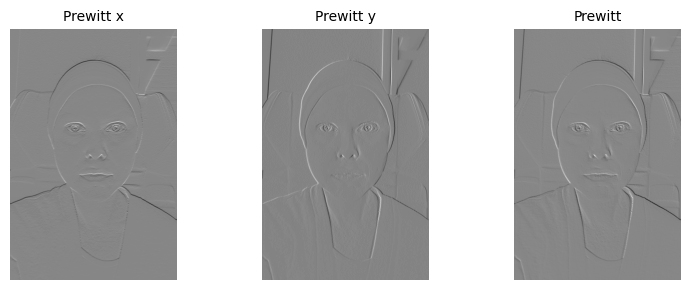

In [44]:
# Judith Martha Prewitt, 1978

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

img_prewitt = img_prewittx + img_prewitty

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(img_prewittx, cmap='gray')
ax[0].set_title('Prewitt x', fontsize=10)

ax[1].imshow(img_prewitty, cmap='gray')
ax[1].set_title('Prewitt y', fontsize=10)

ax[2].imshow(img_prewitt, cmap='gray')
ax[2].set_title('Prewitt', fontsize=10)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()


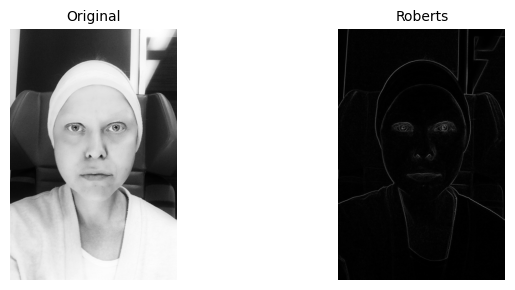

In [22]:
# Roberts, 1965 ( pure inverse matrix)
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )

img = numpydata_gray.astype('float64')
img/=255.0

vertical = ndimage.convolve( img, roberts_cross_v, mode='reflect', cval=0.0 )
horizontal = ndimage.convolve( img, roberts_cross_h,  mode='reflect', cval=0.0 )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

# display results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

ax[0].imshow(numpydata_gray, cmap='gray')
ax[0].set_title('Original', fontsize=10)

ax[1].imshow(edged_img, cmap='gray')
ax[1].set_title('Roberts', fontsize=10)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [ ]:
https://www.geeksforgeeks.org/image-segmentation-using-tensorflow/
https://scikit-image.org/docs/stable/api/skimage.data.html
https://github.com/tensorflow/models/blob/master/docs/vision/semantic_segmentation.ipynb
https://www.tensorflow.org/datasets/catalog/oxford_iiit_pet
http://www.ipol.im/pub/art/2012/g-cv/
https://arxiv.org/pdf/1904.02872.pdf
https://paperswithcode.com/paper/casenet-deep-category-aware-semantic-edge
https://note.nkmk.me/en/python-numpy-opencv-image-binarization/
https://en.wikipedia.org/wiki/Edge_detection
https://pypi.org/project/face-recognition/
https://www.analyticsvidhya.com/blog/2022/10/face-detection-using-haar-cascade-using-python/
https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
https://gist.github.com/rahit/c078cabc0a48f2570028bff397a9e154
https://medium.com/@saiwa.ai/best-image-annotation-tools-a0ee6689c131
https://www.g2.com/articles/object-recognition
https://www.math.cuhk.edu.hk/~lmlui/SegmentationBeltrami.html
https://github.com/jacobgil/Ambrosio-Tortorelli-Minimizer/blob/master/AmbrosioTortorelliMinimizer.py
https://www.researchgate.net/publication/359017379_Parametric_and_geometric_PDE-based_models_for_automatic_image_segmentation
https://www.researchgate.net/figure/Segmentation-without-fusion-a-level-set-of-K-means-b-chan-vese-of-K-means-c-level_fig3_350663563
https://en.wikipedia.org/wiki/Canny_edge_detector
https://www.analyticsvidhya.com/blog/2021/05/image-segmentation-with-felzenszwalbs-algorithm/
https://www.researchgate.net/publication/274120746_Chan-Vese_Segmentation
https://www.slideshare.net/irjetjournal/study-of-various-edge-detection-techniques-and-implementation-of-real-time-frames-edge-detection
https://iopscience.iop.org/article/10.1088/1757-899X/1096/1/012079/pdf

